In [1]:
# Generates XRD refinement figure with (hkl) reflections

In [5]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import matplotlib.ticker as tick
from matplotlib.ticker import FormatStrFormatter
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple

from matplotlib.pyplot import rc
rc("text", usetex=True)
rc("font", **{"family":"sans-serif","sans-serif":["Helvetica"]},size="14")
rc("text.latex",preamble=r"\usepackage{sfmath}")

%matplotlib notebook

In [8]:
# import data
# change number of variables according to current dataset
# change/delete delimiter and skiprows as necessary

# XRD data + refinement
tt, y_obs, sig_obs, y_calc, diff = \
        np.loadtxt("C:/Users/sincl/Documents/MaughanLab/11-BM-B/2022_07_11BM/SRC001-020_Li3ScCl6/SRC001-020_no_antisite/SRC001-020_no_adj.txt",
        unpack=True, dtype=float, delimiter=",", skiprows=2) 

# (hkl) reflections
h_Li3ScCl6, k_Li3ScCl6, l_Li3ScCl6, tt_Li3ScCl6, int_Li3ScCl6 = \
        np.loadtxt("C:/Users/sincl/Documents/MaughanLab/CIFs/Li3ScCl6_C2m_reflections_11BM.txt",
        unpack=True, dtype=float, skiprows=1)

In [15]:
# converts to Q values from 2theta values if needed

wavelength_PXRD = 1.54
wavelength_11_BM_B = 0.458957
wavelength_11_ID_B = 0.14320
wavelength_17_BM_B = 0.24107

# conversion function, takes parameters tt (2theta) and wl (instrument wavelength)
def tt_to_q(tt,wl):
    Q = 4*np.pi*np.sin((tt*np.pi)/360)/wl
    return Q

# example: q_somedataset = tt_to_q(tt_somedataset, wavelength_PXRD)

q_020 = tt_to_q(tt, wavelength_11_BM_B)
q_Li3ScCl6_ticks = tt_to_q(tt_Li3ScCl6, wavelength_11_BM_B)

<IPython.core.display.Javascript object>


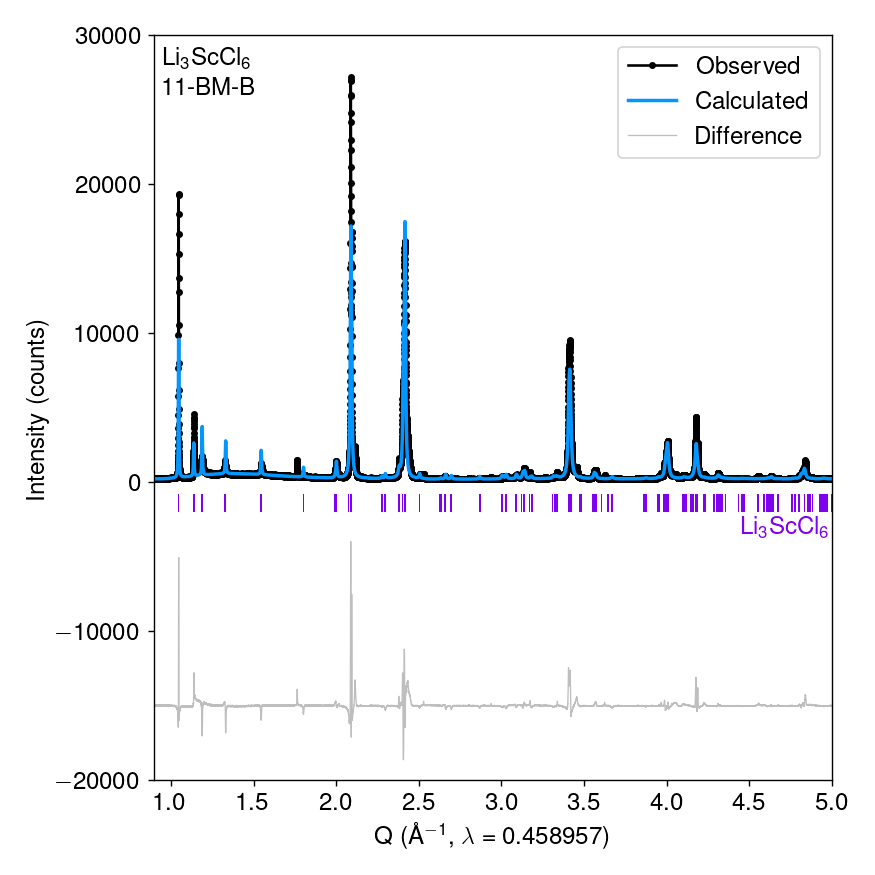

In [39]:
# generates plot
plt.figure(figsize=(7,7))

# plot data
plt.plot(q_020, y_obs, label="Observed", color="black", marker=".")
plt.plot(q_020, y_calc, label="Calculated", color="#0496FF", linewidth="2")
plt.plot(q_020, diff-15000, label="Difference", color="#BEBEBE", linewidth="0.75")

# plot (hkl) reflection ticks
plt.bar(q_Li3ScCl6_ticks, height=1200,width=0.01, bottom=-2000, align='center', data=None, color="#8000F0")

# set axis limits
plt.xlim(0.9,5)
plt.ylim(-20000, 30000)

# add text labels for ticks
plt.text(4.45, -3500,"Li$_{3}$ScCl$_6$", color="#8000F0")

# x-axis labels
# PXRD
#plt.xlabel("2" r"$\theta$" " / " r"$^{\circ}$" "(Cu K"r"$\alpha$"")")
# 11-BM-B
#plt.xlabel("2" r"$\theta$" " / " r"$^{\circ}$" "($\lambda=0.458957$)")
# converted to Q
plt.xlabel("Q (\AA" r"$^{-1}$, $\lambda=0.458957$" ")")

# y-axis label
plt.ylabel("Intensity (counts)")

# set title
# above figure title
#plt.title.set_text("$Li_{3}ScCl_6$")
# in-figure title
plt.text(0.95, 28000, "Li$_{3}$ScCl$_6$")
plt.text(0.95, 26000, "11-BM-B")

plt.legend()
plt.tight_layout()

# saves PNG image of figure
#plt.savefig("C:/Users/sincl/Desktop/020_no_adj.png",bbox_inches='tight',dpi=1000) 